<a href="https://colab.research.google.com/github/saquibali7/MultiModalHateDetection/blob/main/MultimodalHateSpeech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import cv2
import torch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
HateSpeech = "/content/drive/MyDrive/hateSpeechDetection/Hate Speech"
NoHateSpeech = "/content/drive/MyDrive/hateSpeechDetection/No Hate Speech"


In [30]:
HateImages = os.listdir(HateSpeech)
NotHateImages = os.listdir(NoHateSpeech)
print(len(HateImages), len(NotHateImages))

1942 1658


In [4]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,824 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [5]:
import pytesseract
import shutil
import random
from pytesseract import pytesseract

In [6]:
def extract_text(path):
  image_path=path
  extractedInformation = pytesseract.image_to_string(Image.open(image_path))
  return extractedInformation



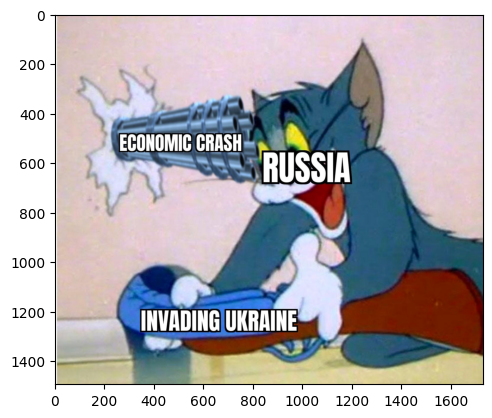

In [11]:
images = os.listdir(HateSpeech)
idx = random.randint(0,len(images))
img_path = os.path.join(HateSpeech,images[idx])
img = Image.open(img_path)
img = np.array(img)
# img = cv2.resize(img, (256,256))
plt.imshow(img)

In [12]:
text = extract_text(img_path)
print(text)
text = text.lower()
text = text.split(' ')

| a Brie

   
   

INVADING|UKRAINE
ae ee



In [13]:
print(text)

['|', 'a', 'brie\n\n', '', '', '\n', '', '', '\n\ninvading|ukraine\nae', 'ee\n\x0c']


In [14]:
for _ in range(5):
  dx = random.randint(0,len(images))
  img_path = os.path.join(HateSpeech,images[idx])
  img = Image.open(img_path)
  img = np.array(img)
  print(img.shape)

(1494, 1730, 3)
(1494, 1730, 3)
(1494, 1730, 3)
(1494, 1730, 3)
(1494, 1730, 3)


## Text PreProcessing

In [15]:
!pip install 'portalocker>=2.0.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import torchtext
from torchtext.data import get_tokenizer
tokenizer = get_tokenizer("basic_english")
from torchtext.datasets import AG_NEWS
train_iter = iter(AG_NEWS(split='train'))

In [17]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')
train_iter = AG_NEWS(split='train')

def yield_tokens(data_iter):
    for _, text in data_iter:
      yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [43]:
preprocess_text=[]

def preprocess(path):
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    extracted_text = extract_text(img_path)
    extracted_text = extracted_text.lower()
    extracted_text = extracted_text.split(' ')
    extracted_tokens=vocab(extracted_text)
    preprocess_text.append(extracted_tokens)



In [44]:
preprocess(HateSpeech)

In [45]:
preprocess(NoHateSpeech)

In [50]:
torch.nn.utils.rnn.pad_sequence([torch.tensor(p) for p in preprocess_text], batch_first=True)

tensor([[25470, 25470,     0,  ...,     0,     0,     0],
        [    0,     0,     0,  ...,     0,     0,     0],
        [   29,     2,  2163,  ...,     0,     0,     0],
        ...,
        [    0,     0,     0,  ...,     0,     0,     0],
        [ 3393, 29774,     0,  ...,     0,     0,     0],
        [    0,   269,    20,  ...,     0,     0,     0]])

In [56]:
preprocess_text=np.array(preprocess_text)

<ipython-input-56-ba9968af148e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  preprocess_text=np.array(preprocess_text)


In [60]:
%cd "/content/drive/MyDrive/hateSpeechDetection/"

/content/drive/MyDrive/hateSpeechDetection


In [61]:
path = "/content/drive/MyDrive/hateSpeechDetection/"

In [62]:
import pickle as pkl

fileName = path + 'preprocess_text'
fileObject = open(fileName, 'wb')

pkl.dump(preprocess_text, fileObject)
fileObject.close()

In [59]:
print(preprocess_text.shape)

(3600,)


In [74]:
extracted_sentence = []

def preprocess_sentence(path):
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    extracted_text = extract_text(img_path)
    extracted_sentence.append(extracted_text)



In [72]:
preprocess_sentence(HateSpeech)
preprocess_sentence(NoHateSpeech)

In [73]:
fileName = path + 'preprocess_sentence'
fileObject = open(fileName, 'wb')

pkl.dump(extracted_sentence, fileObject)
fileObject.close()

## Text feature extraction Model

In [46]:
!!pip install transformers 

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting transformers',
 '  Downloading transformers-4.30.1-py3-none-any.whl (7.2 MB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/7.2 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━\x1b \x1b3.8/7.2 MB\x1b \x1b114.1 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b \x1b7.2/7.2 MB\x1b \x1b145.4 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b7.2/7.2 MB\x1b \x1b83.3 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: filelock in /usr/local/lib/python3.10/dist-packages (from transformers) (3.12.0)',
 'Collecting huggingface-hub<1.0,>=0.14.1 (from transformers)',
 '  Downloading huggingface_hub-0.15.1-py3-none-any.whl (236 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━

In [47]:
from transformers import AutoTokenizer, AutoModel
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [63]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased").to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenized_train = tokenizer(extracted_sentence.tolist(), padding = True, truncation = True, return_tensors="pt")
tokenized_val = tokenizer(df_val["short_description"].values.tolist() , padding = True, truncation = True,  return_tensors="pt")

print(tokenized_train.keys())

#move on device (GPU)
tokenized_train = {k:torch.tensor(v).to(device) for k,v in tokenized_train.items()}
tokenized_val = {k:torch.tensor(v).to(device) for k,v in tokenized_val.items()}

In [ ]:
with torch.no_grad():
  hidden_train = model(**tokenized_train) #dim : [batch_size(nr_sentences), tokens, emb_dim]
  hidden_val = model(**tokenized_val)

#get only the [CLS] hidden states
cls_train = hidden_train.last_hidden_state[:,0,:]
cls_val = hidden_val.last_hidden_state[:,0,:]